Import statements

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer


Preprocess the lifestyle dataset first 

In [2]:

# Load data
lifestyle_data = pd.read_csv('datasets/lifestyle_dataset.csv')

print("Check the initial shape of the lifestyle dataset")

# Check the initial shape of the lifestyle dataset
print("Shape of the lifestyle dataset:")
print(lifestyle_data.shape)

# Display the first few rows of the dataset
print("First 5 rows of the lifestyle dataset:")
print(lifestyle_data.head())

print("Checking for null values")

lifestyle_data.isnull().sum()

Check the initial shape of the lifestyle dataset
Shape of the lifestyle dataset:
(8763, 26)
First 5 rows of the lifestyle dataset:
  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4        

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

From the initial shape. 
1. The Patient ID should be dropped. 
2. Sex should be encoded into either 1s or 0s 
3. Blood pressure should be split into diastolic/systolic pressure columns
4. Country, Hemisphere, Continent as they have negligible effects
5. Income should be dropped

There are no null values

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Split the 'Blood Pressure' column into 'Systolic_BP' and 'Diastolic_BP'
blood_pressure_split = lifestyle_data['Blood Pressure'].str.split('/', expand=True)
lifestyle_data['Systolic_BP'] = pd.to_numeric(blood_pressure_split[0], errors='coerce')
lifestyle_data['Diastolic_BP'] = pd.to_numeric(blood_pressure_split[1], errors='coerce')

# Drop the original 'Blood Pressure' column
lifestyle_data = lifestyle_data.drop(columns=['Blood Pressure'])

# Dropping additional columns from the lifestyle dataset
columns_to_remove = ['Hemisphere', 'Patient ID', 'Income', 'Continent', 'Country']
lifestyle_data = lifestyle_data.drop(columns=columns_to_remove)

# Preprocessing the lifestyle dataset by dropping the output column
Xlifestyle = lifestyle_data.drop('Heart Attack Risk', axis=1)
Ylifestyle = lifestyle_data['Heart Attack Risk']

# Identify categorical columns
categorical_columns = ['Sex', 'Diet']

# Identify numeric columns for scaling
numeric_columns = Xlifestyle.select_dtypes(include=['float64', 'int64']).columns.difference(['Systolic_BP', 'Diastolic_BP'])
blood_pressure_columns = ['Systolic_BP', 'Diastolic_BP']

# Create a column transformer for handling both categorical and numerical features
life_robust_scaled_preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_columns),  # Standard scale selected numerical columns
        ('bp', RobustScaler(), blood_pressure_columns),  # Robust scaler is better for the bp columns because of the greater value range, I have seen a significant drop in
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ]
)

# Fit the preprocessor and transform the data
Xlifestyle_scaled = life_robust_scaled_preprocessor.fit_transform(Xlifestyle)

# Check the processed dataset
print("The processed lifestyle dataset")
print(lifestyle_data.head())

# Calculate variance for Systolic_BP and Diastolic_BP (before scaling)
systolic_variance = lifestyle_data['Systolic_BP'].var()
diastolic_variance = lifestyle_data['Diastolic_BP'].var()

print("Variance of Systolic Blood Pressure (before scaling):", systolic_variance)
print("Variance of Diastolic Blood Pressure (before scaling):", diastolic_variance)
# Calculate variance after scaling for Systolic_BP and Diastolic_BP
# Convert scaled data back to DataFrame for easier inspection
scaled_columns = numeric_columns.tolist() + blood_pressure_columns + list(life_robust_scaled_preprocessor.named_transformers_['cat'].get_feature_names_out())
Xlifestyle_scaled_df = pd.DataFrame(Xlifestyle_scaled, columns=scaled_columns)

# Calculate variance after scaling for Systolic_BP and Diastolic_BP
scaled_systolic_variance = Xlifestyle_scaled_df['Systolic_BP'].var()
scaled_diastolic_variance = Xlifestyle_scaled_df['Diastolic_BP'].var()

# Print the variance after scaling
print("Variance of Systolic Blood Pressure (after scaling):", scaled_systolic_variance)
print("Variance of Diastolic Blood Pressure (after scaling):", scaled_diastolic_variance)




The processed lifestyle dataset
   Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    Male          208          72         0               0        1   
1   21    Male          389          98         1               1        1   
2   21  Female          324          72         1               0        0   
3   84    Male          383          73         1               1        1   
4   66    Male          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ... Medication Use  \
0        0                    0                 4.168189  ...              0   
1        1                    1                 1.813242  ...              0   
2        0                    0                 2.078353  ...              1   
3        0                    1                 9.828130  ...              0   
4        1                    0                 5.804299  ...              0   

   Stress Level  S

Preprocess the clinical dataset

In [9]:
clinical_data = pd.read_csv('datasets/clinical_dataset.csv')


# Check the initial shape of the clinical dataset
print("Shape of the clinical dataset:")
print(clinical_data.shape)

# Display the first few rows of the clinical dataset
print("First 5 rows of the clinical dataset:")
print(clinical_data.head())

print("Checking for null values in the clinical dataset")
print(clinical_data.isnull().sum())

print("Check the datatypes of all columns in clinical")
print(clinical_data.dtypes)

# Split the clinical dataset into X and Y and scale

Xclinical = clinical_data.drop('output', axis=1)
Yclinical = clinical_data['output']

clinical_preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), Xclinical.select_dtypes(include=['float64', 'int64']).columns),  # Numerical columns
    ])


Xclinical_scaled = clinical_preprocessor.fit_transform(Xclinical)

Shape of the clinical dataset:
(303, 14)
First 5 rows of the clinical dataset:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
Checking for null values in the clinical dataset
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
Check the datatypes of all columns in clinical
age      

All columns are numeric and there are no null values present for the clinical dataset 

Perform PCA analysis

Variance before scaling:
Systolic_BP     694.321255
Diastolic_BP    215.401557
dtype: float64
Variance after scaling:
Systolic_BP     0.211072
Diastolic_BP    0.211072
dtype: float64
Explained variance ratio for Lifestyle dataset PCA: [0.0948666  0.07482196]
Explained variance ratio for Clinical dataset PCA: [0.24992346 0.14247749]
18
12


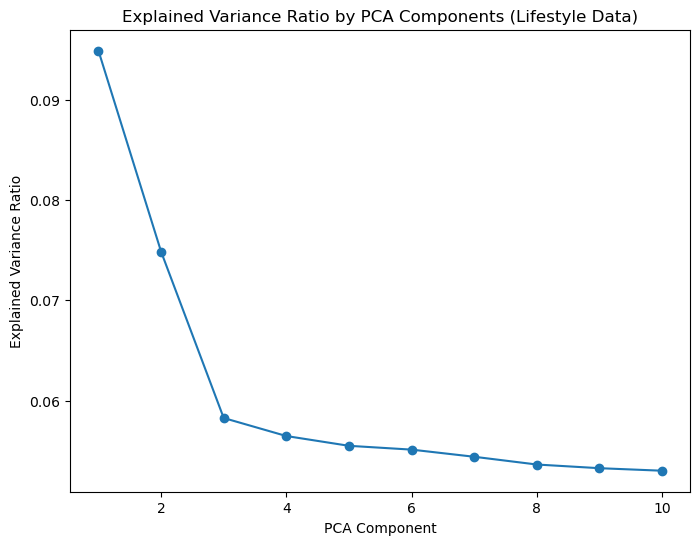

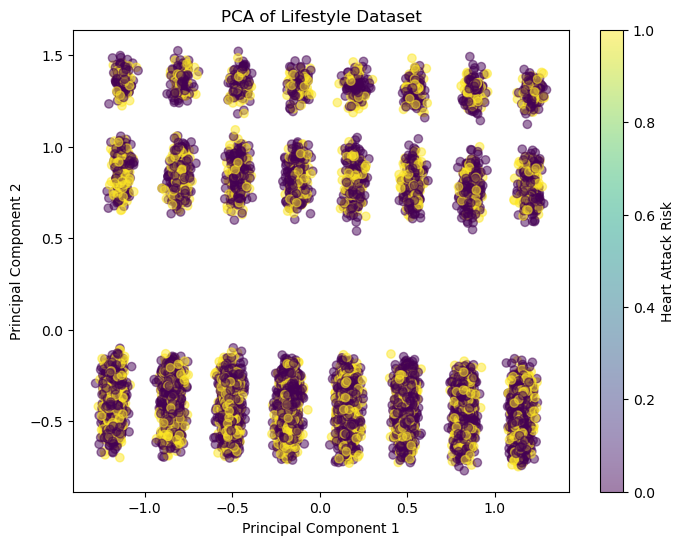

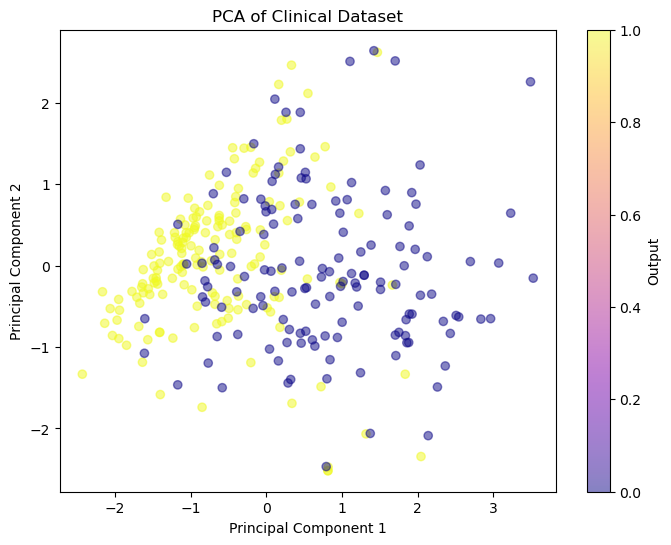

low variance columns
Index(['Sex', 'Diabetes', 'Smoking', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Previous Heart Problems', 'Stress Level',
       'Sedentary Hours Per Day', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


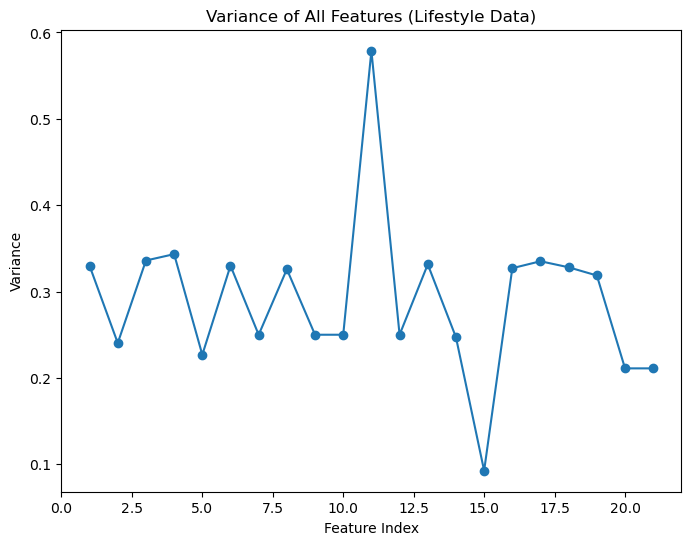

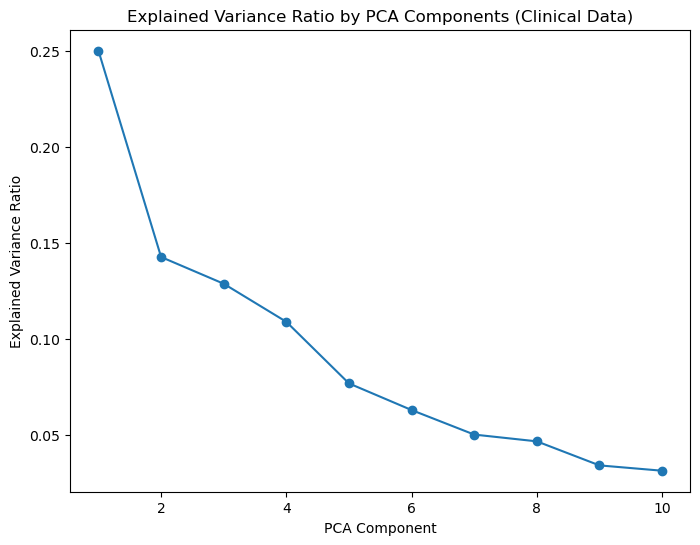

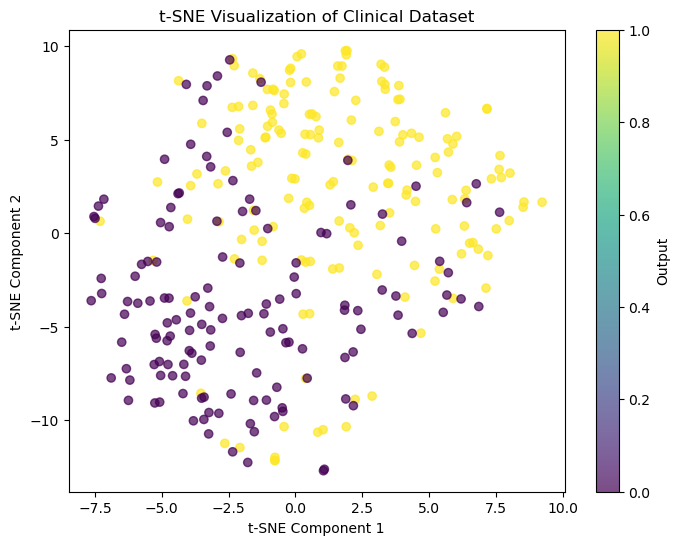

c:\Users\Elvis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


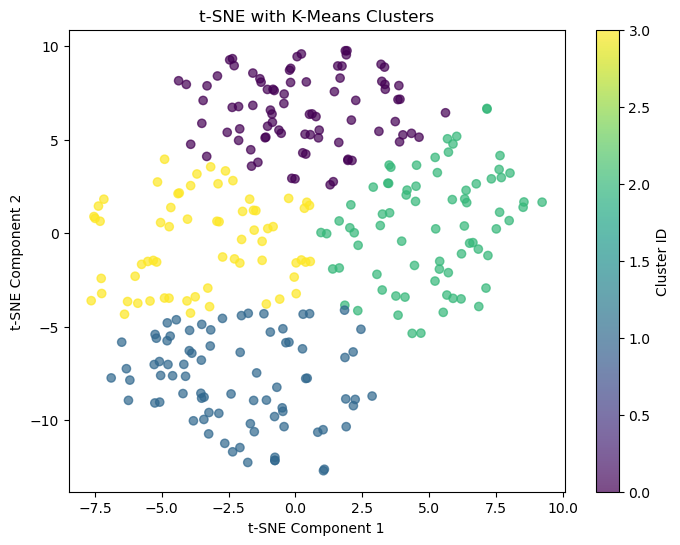

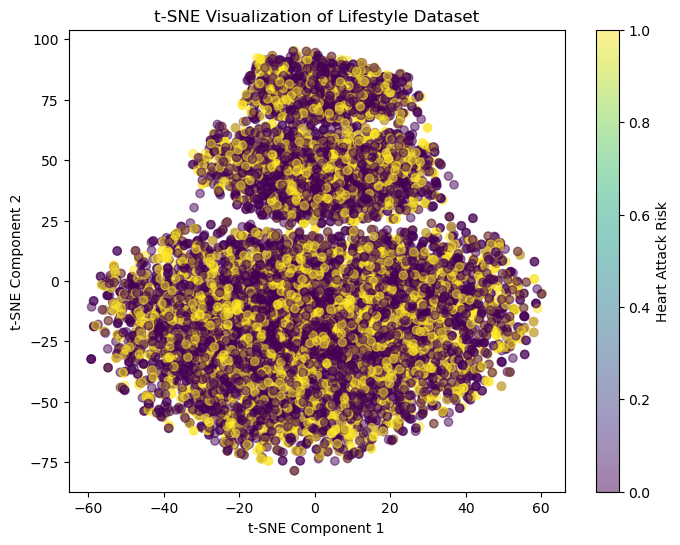

In [8]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Variance before scaling
print("Variance before scaling:")
print(lifestyle_data[['Systolic_BP', 'Diastolic_BP']].var())
print("Variance after scaling:")
scaled_variance = pd.DataFrame(Xlifestyle_scaled, columns=Xlifestyle.columns).var()


print(scaled_variance[['Systolic_BP', 'Diastolic_BP']])
# Apply PCA on the lifestyle dataset
pca_lifestyle = PCA(n_components=2)  # Adjust n_components as needed
Xlifestyle_pca = pca_lifestyle.fit_transform(Xlifestyle_scaled)

# Apply PCA on the clinical dataset
pca_clinical = PCA(n_components=2)  # Adjust n_components as needed
Xclinical_pca = pca_clinical.fit_transform(Xclinical_scaled)

# Check the explained variance ratio to understand how much variance is captured
print("Explained variance ratio for Lifestyle dataset PCA:", pca_lifestyle.explained_variance_ratio_)
print("Explained variance ratio for Clinical dataset PCA:", pca_clinical.explained_variance_ratio_)

# Check the number of columns of the dataset
num_lifestyle_col = len(Xlifestyle.select_dtypes(include=['float64', 'int64']).columns) - 1
num_clinical_col = len(Xclinical.select_dtypes(include=['float64', 'int64']).columns) - 1


print(num_lifestyle_col)
print(num_clinical_col)


# Optionally, you can visualize the PCA results to see how well the datasets are represented in 2D spaces


# Increase the number of components
pca_lifestyle = PCA(n_components=10)  # Adjust to capture more variance
Xlifestyle_pca = pca_lifestyle.fit_transform(Xlifestyle_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), pca_lifestyle.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by PCA Components (Lifestyle Data)')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot Lifestyle PCA
plt.figure(figsize=(8, 6))
plt.scatter(Xlifestyle_pca[:, 0], Xlifestyle_pca[:, 1], c=Ylifestyle, cmap='viridis', alpha=0.5)
plt.title("PCA of Lifestyle Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Heart Attack Risk')
plt.show()

# Plot Clinical PCA
plt.figure(figsize=(8, 6))
plt.scatter(Xclinical_pca[:, 0], Xclinical_pca[:, 1], c=Yclinical, cmap='plasma', alpha=0.5)
plt.title("PCA of Clinical Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Output')
plt.show()

# Apply PCA with more components to visualize the explained variance ratio
pca_clinical = PCA(n_components=10)
pca_clinical.fit(Xclinical_scaled)

# Calculate the variance of each feature in the lifestyle dataset (assuming Xlifestyle is a DataFrame)
feature_variances = Xlifestyle_scaled.var(axis=0)

# Identify columns with very low variance
low_variance_columns = Xlifestyle_scaled.var(axis=0) < 0.3  # Threshold for low variance
print("low variance columns")
print(Xlifestyle.columns[low_variance_columns])


# Plot the variances of all features
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(feature_variances) + 1), feature_variances, marker='o', linestyle='-')
plt.title('Variance of All Features (Lifestyle Data)')
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.show()

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), pca_clinical.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by PCA Components (Clinical Data)')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming the clinical data has been scaled and prepared as 'Xclinical_scaled'
# Apply t-SNE to the scaled clinical data
tsne_clinical = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
Xclinical_tsne = tsne_clinical.fit_transform(Xclinical_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(Xclinical_tsne[:, 0], Xclinical_tsne[:, 1], c=Yclinical, cmap='viridis', alpha=0.7)
plt.title("t-SNE Visualization of Clinical Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Output')
plt.show()

from sklearn.cluster import KMeans
import pandas as pd

# Apply K-Means clustering to the t-SNE output
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(Xclinical_tsne)

# Add the cluster labels to the t-SNE DataFrame
tsne_results = pd.DataFrame(Xclinical_tsne, columns=['Component 1', 'Component 2'])
tsne_results['Cluster'] = clusters
tsne_results['Output'] = Yclinical

# Visualize clusters with t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results['Component 1'], tsne_results['Component 2'], c=tsne_results['Cluster'], cmap='viridis', alpha=0.7)
plt.title("t-SNE with K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster ID')
plt.show()

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to the scaled lifestyle data
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # Adjust perplexity if needed
Xlifestyle_tsne = tsne.fit_transform(Xlifestyle_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(Xlifestyle_tsne[:, 0], Xlifestyle_tsne[:, 1], c=Ylifestyle, cmap='viridis', alpha=0.5)
plt.title("t-SNE Visualization of Lifestyle Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Heart Attack Risk')
plt.show()

